<h1>Load data</h1>

In [2]:
import pandas as pd
#Find the ten most/least common words

In [3]:
df_apple = pd.read_csv("../data/aapl_us_equities_news_prep_text_consol_text_html_inval_upper_char_lemmas_stopwords.csv")
df_apple.head(5)

,text,target
0,wait direction market stock market difficult t...,1
1,mid year update u s canadian stock market sect...,1
2,trade apple earning apple earning preview quar...,1
3,market bait switch sound go hear soon btfd cro...,0
4,aapl fall tree apple s aapl sale quarter miss ...,1


<h1>Word Cloud</h1>

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

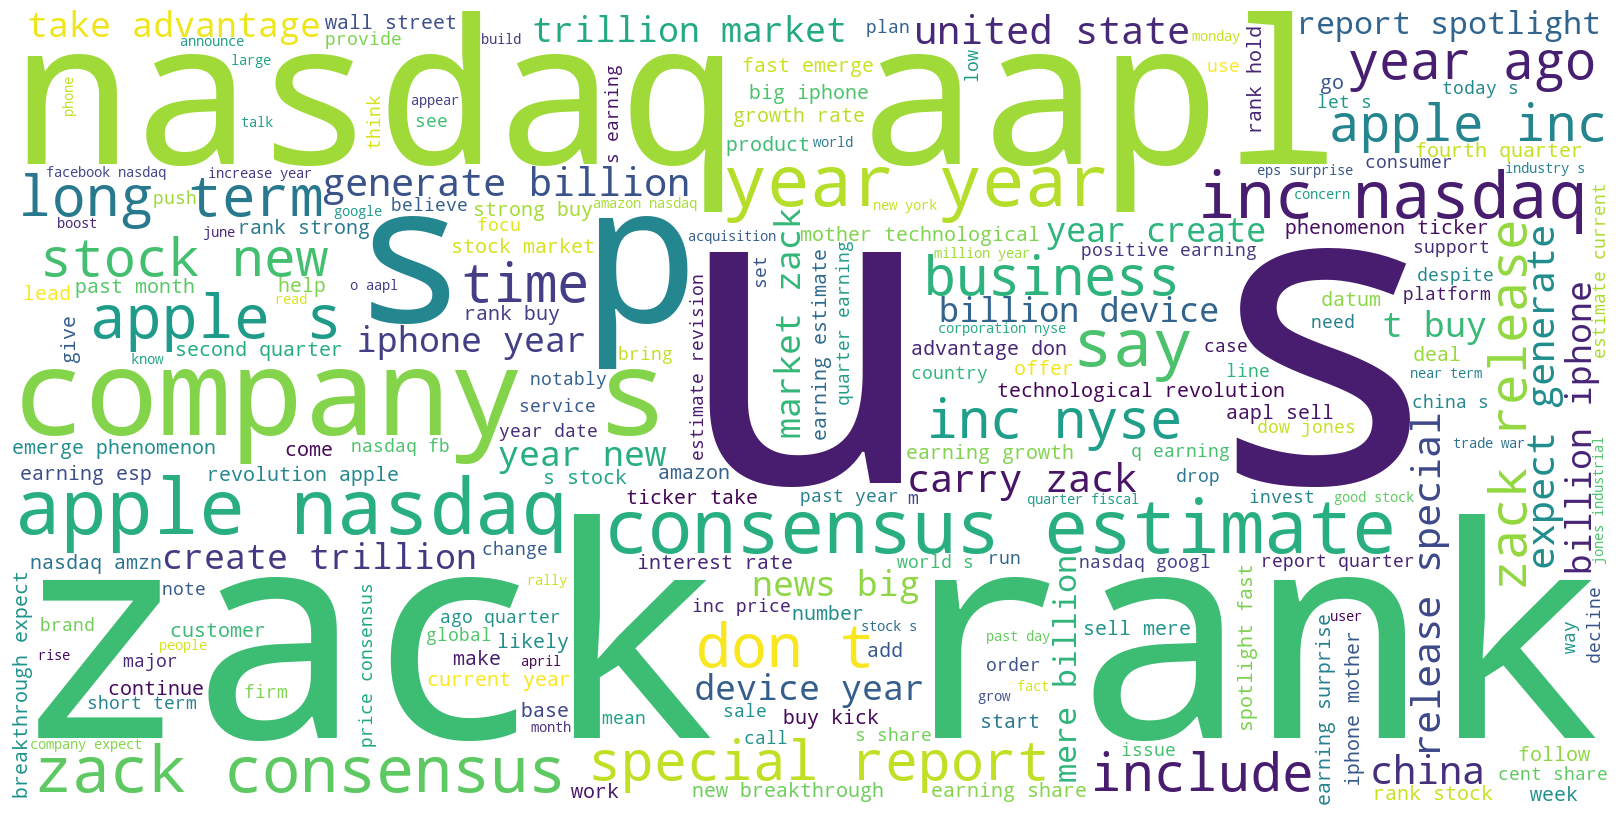

In [90]:
#Initialize word cloud
moby_dick_str = " ".join(ALL_tokens_positive)
wordcloud = WordCloud(width = 1600, height = 800,
background_color ='white',
min_font_size =
10).generate(moby_dick_str)

#Create the Word cloud
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

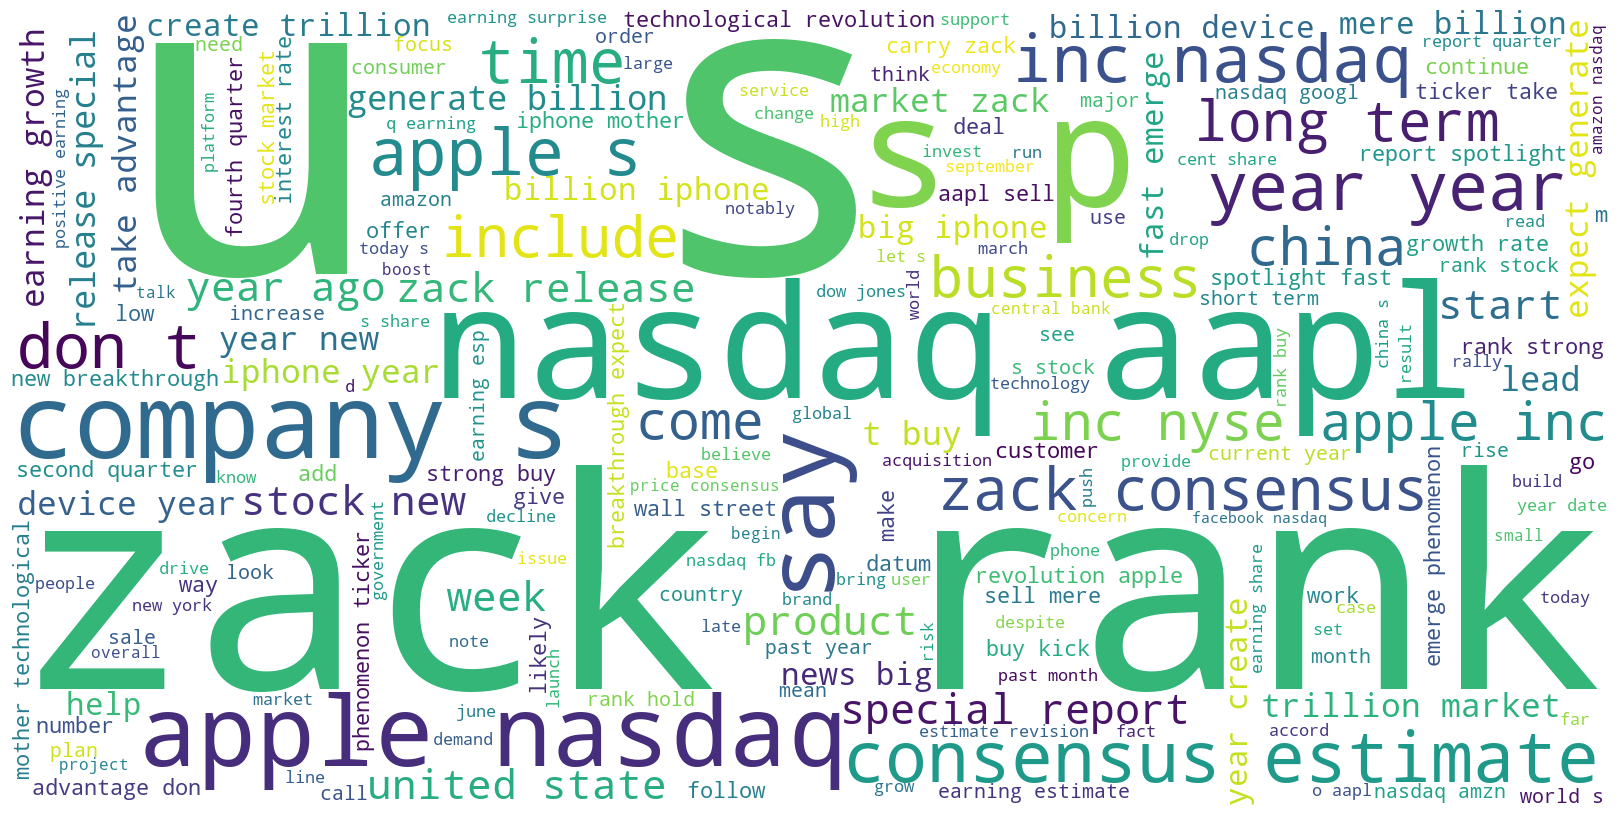

In [95]:
#Initialize word cloud
moby_dick_str = " ".join(ALL_tokens_neg)
wordcloud = WordCloud(width = 1600, height = 800,
background_color ='white',
min_font_size =
10).generate(moby_dick_str)

#Create the Word cloud
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h2>To many words that do nothing therefore more preprocessing is needed</h2>

<h1>Preprocessing V2</h1>

In [7]:
from collections import Counter
from nltk import word_tokenize

In [8]:
df_apple_increase = df_apple[df_apple['target']==1]
tokens_pos = df_apple_increase['text'].apply(word_tokenize)

ALL_tokens_positive = []
for token_list in tokens_pos:
    ALL_tokens_positive.extend(token_list)

    
df_apple_decrease = df_apple[df_apple['target']==0]
tokens_neg = df_apple_decrease['text'].apply(word_tokenize)    

ALL_tokens_neg = []
for token_list in tokens_neg:
    ALL_tokens_neg.extend(token_list)
    

In [9]:
#Find the ten most/least common words
counted_pos = Counter(ALL_tokens_positive)
counted_neg = Counter(ALL_tokens_neg)

In [96]:
counted_pos.most_common(50)

[('s', 82109),
 ('year', 41768),
 ('company', 37347),
 ('stock', 33168),
 ('apple', 28959),
 ('market', 26373),
 ('earning', 23860),
 ('nasdaq', 23272),
 ('zack', 21022),
 ('quarter', 20843),
 ('billion', 18445),
 ('share', 17775),
 ('report', 16897),
 ('expect', 15959),
 ('high', 15118),
 ('say', 14925),
 ('growth', 14907),
 ('new', 14798),
 ('million', 14471),
 ('estimate', 14376),
 ('price', 13410),
 ('nyse', 13402),
 ('revenue', 13331),
 ('inc', 13056),
 ('u', 12847),
 ('rank', 12285),
 ('iphone', 12157),
 ('buy', 12081),
 ('t', 11245),
 ('investor', 11205),
 ('aapl', 11116),
 ('day', 10374),
 ('sale', 10139),
 ('trade', 9611),
 ('time', 9440),
 ('p', 9410),
 ('month', 9228),
 ('increase', 8809),
 ('week', 8773),
 ('low', 8689),
 ('gain', 8577),
 ('rate', 8451),
 ('strong', 8216),
 ('sell', 8194),
 ('consensus', 8110),
 ('rise', 7974),
 ('industry', 7973),
 ('china', 7863),
 ('service', 7850),
 ('big', 7833)]

* alle loss letters (TOM)
* HTML
* Verwijder woorden die er maar een keer inzitten  (SEM)
* Verwijder woorden die veel te veel voorkomen (SEM)

In [158]:
counted_pos_above_1 = Counter({x: count for x, count in counted_pos.items() if count > 1})


52932


28791

In [157]:
counted_neg_above_1 = Counter({x: count for x, count in counted_neg.items() if count > 1})

<h1>Calculate TFIDF</h1>

In [131]:
from tqdm import tqdm
import math
import numpy as np

In [159]:
# number of times term i is in document / total number of terms in document
def tf(word, counter):
    return counter[word] / sum(counter.values())

def n_containing(word):
    return min(1, counted_pos[word]) + min(1, counted_neg[word])

#log of (number of documents / by number of documents containing word i)
def idf(word):
    return math.log(2 / (n_containing(word)))

def tfidf(word, counter):     
    return tf(word, counter) * idf(word)

In [160]:
Documents = [counted_pos_above_1, counted_neg_above_1]
results = []
for i, document in enumerate(Documents):
    scores = Counter({word: tfidf(word, document) for word in tqdm(document)})
    results.append(scores)
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29619/29619 [00:05<00:00, 5726.80it/s]


In [163]:
results[0].most_common(50)

[('greggs', 1.1525056101279318e-05),
 ('okta', 7.256516804509201e-06),
 ('nxt', 5.9759550154781645e-06),
 ('tibetan', 5.762528050639659e-06),
 ('peloton', 5.762528050639659e-06),
 ('mongodb', 5.335674120962648e-06),
 ('aveo', 5.122247156124141e-06),
 ('repsol', 4.908820191285635e-06),
 ('supercharger', 4.481966261608624e-06),
 ('ralinepag', 4.481966261608624e-06),
 ('biodelivery', 4.268539296770118e-06),
 ('nominum', 4.268539296770118e-06),
 ('hectoliter', 4.268539296770118e-06),
 ('globle', 4.268539296770118e-06),
 ('banng', 4.268539296770118e-06),
 ('domo', 4.268539296770118e-06),
 ('mann', 4.055112331931612e-06),
 ('mettler', 4.055112331931612e-06),
 ('tennant', 3.841685367093107e-06),
 ('vail', 3.6282584022546005e-06),
 ('kroe', 3.6282584022546005e-06),
 ('belbuca', 3.6282584022546005e-06),
 ('avista', 3.6282584022546005e-06),
 ('tierra', 3.6282584022546005e-06),
 ('bombardi', 3.4148314374160943e-06),
 ('nude', 3.4148314374160943e-06),
 ('contrafund', 3.4148314374160943e-06),
 ('fp

In [169]:
print(results[1].most_common(50))
counted_neg["masternode"]

[('oryx', 2.5036123888834977e-05), ('masternode', 7.854470239634501e-06), ('embe', 6.136304874714455e-06), ('freeprint', 6.136304874714455e-06), ('lonestar', 5.645400484737298e-06), ('gsky', 5.645400484737298e-06), ('sv', 5.3999482897487194e-06), ('docomo', 5.3999482897487194e-06), ('rovio', 5.154496094760142e-06), ('kat', 4.909043899771564e-06), ('ozk', 4.909043899771564e-06), ('sikka', 4.663591704782986e-06), ('vj', 4.663591704782986e-06), ('unibail', 4.663591704782986e-06), ('paragon', 4.663591704782986e-06), ('umm', 4.663591704782986e-06), ('tantan', 4.663591704782986e-06), ('xd', 4.418139509794408e-06), ('fam', 4.418139509794408e-06), ('kx', 4.418139509794408e-06), ('kk', 4.418139509794408e-06), ('aoi', 4.418139509794408e-06), ('kura', 4.418139509794408e-06), ('ftd', 4.418139509794408e-06), ('tabula', 4.418139509794408e-06), ('rasa', 4.418139509794408e-06), ('givemesport', 4.418139509794408e-06), ('callan', 4.172687314805829e-06), ('qf', 4.172687314805829e-06), ('pw', 4.1726873148

32

<h1>Scratch</h1>

In [44]:
bloblist = [tb(Pos_docu),tb(Neg_docu)]
results = []
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in tqdm(blob.words)}
    results.append(scores)
    



Top words in document 1


  0%|                                                                                                                                                                                        | 532/3271843 [02:15<226:02:17,  4.02it/s]

KeyboardInterrupt: 

In [ ]:
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
results.append(sorted_words)
for word, score in sorted_words[:50]:
    print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

In [41]:
all_text = []
for text in df_apple_increase['text']:
    all_text.append(text)

Pos_docu = ' '.join(all_text)
    
all_text = []
for text in df_apple_decrease['text']:
    all_text.append(text)

Neg_docu = ' '.join(all_text)

In [19]:
def extract_ngrams(data, num):
    n_grams = ngrams(data, num)
    return [ ' '.join(grams) for grams in n_grams]

In [52]:
Intersect = Ngrams_pos_counted - Ngrams_neg_counted

for item, count in Intersect.items():

    Intersect[item] /= Ngrams_pos_counted[item] + Ngrams_neg_counted[item]

intersect_above_80 = Counter({x: count for x, count in Intersect.items() if count >= 0.8})

Pos_candidates = []
for item, count in intersect_above_80.items():
    if Ngrams_pos_counted[item] > 10:
        Pos_candidates.append((item, Ngrams_pos_counted[item]))


In [32]:
x = extract_ngrams(ALL_tokens_positive,2)
Ngrams_pos_counted = Counter(x)

In [33]:
x = extract_ngrams(ALL_tokens_neg,2)
Ngrams_neg_counted = Counter(x)


In [46]:
intersect_above_80.most_common(10)


[('wait direction', 1.0),
 ('difficult trader', 1.0),
 ('alike directionless', 1.0),
 ('directionless choppiness', 1.0),
 ('choppiness combine', 1.0),
 ('climate maximum', 1.0),
 ('maximum frustration', 1.0),
 ('frustration professional', 1.0),
 ('professional talk', 1.0),
 ('talk unfortunately', 1.0)]

In [28]:
Intersect = counted_pos - counted_neg

for item, count in Intersect.items():

    Intersect[item] /= counted_pos[item] + counted_neg[item]

intersect_above_80 = Counter({x: count for x, count in Intersect.items() if count >= 0.2})

Pos_candidates = []
for item, count in intersect_above_80.items():
    if counted_pos[item] > 10:
        Pos_candidates.append((item,counted_pos[item]))
